In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
fake = pd.read_csv("Fake1.csv")
true = pd.read_csv("True.csv")


In [4]:
fake['label'] = 0   # Fake news
true['label'] = 1   # Real news


In [6]:
df = pd.concat([fake, true], axis=0)
df = df[['text', 'label']]
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle Students now have a clean dataset ready for NLP.


In [7]:
df

,text,label
0,"Right-wing provocateur, Neo-Nazi, all around d...",0
1,Donald Trump is successfully ruining all of ou...,0
2,WASHINGTON (Reuters) - Republicans will consid...,1
3,Larry King has been in the radio and journalis...,0
4,LONDON (Reuters) - Britain and Germany agreed ...,1
...,...,...
15993,Conservatives have something to say about abso...,0
15994,Trump just will not stop hammering his border ...,0
15995,Donald Trump s pick for Communications Directo...,0
15996,(Reuters) - Alabama Governor Kay Ivey on Tuesd...,1


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>', '', text)           # remove HTML tags
    text = re.sub(r'\d+', '', text)             # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # punctuation
    return text


In [9]:
df['clean_text'] = df['text'].apply(clean_text)

In [10]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [11]:
df.head(5)

,text,label,clean_text
0,"Right-wing provocateur, Neo-Nazi, all around d...",0,rightwing provocateur neonazi all around douch...
1,Donald Trump is successfully ruining all of ou...,0,donald trump is successfully ruining all of ou...
2,WASHINGTON (Reuters) - Republicans will consid...,1,washington reuters republicans will consider ...
3,Larry King has been in the radio and journalis...,0,larry king has been in the radio and journalis...
4,LONDON (Reuters) - Britain and Germany agreed ...,1,london reuters britain and germany agreed on ...


In [12]:
df["tokens"] = df["clean_text"].apply(word_tokenize)


In [13]:
df

,text,label,clean_text,tokens
0,"Right-wing provocateur, Neo-Nazi, all around d...",0,rightwing provocateur neonazi all around douch...,"[rightwing, provocateur, neonazi, all, around,..."
1,Donald Trump is successfully ruining all of ou...,0,donald trump is successfully ruining all of ou...,"[donald, trump, is, successfully, ruining, all..."
2,WASHINGTON (Reuters) - Republicans will consid...,1,washington reuters republicans will consider ...,"[washington, reuters, republicans, will, consi..."
3,Larry King has been in the radio and journalis...,0,larry king has been in the radio and journalis...,"[larry, king, has, been, in, the, radio, and, ..."
4,LONDON (Reuters) - Britain and Germany agreed ...,1,london reuters britain and germany agreed on ...,"[london, reuters, britain, and, germany, agree..."
...,...,...,...,...
15993,Conservatives have something to say about abso...,0,conservatives have something to say about abso...,"[conservatives, have, something, to, say, abou..."
15994,Trump just will not stop hammering his border ...,0,trump just will not stop hammering his border ...,"[trump, just, will, not, stop, hammering, his,..."
15995,Donald Trump s pick for Communications Directo...,0,donald trump s pick for communications directo...,"[donald, trump, s, pick, for, communications, ..."
15996,(Reuters) - Alabama Governor Kay Ivey on Tuesd...,1,reuters alabama governor kay ivey on tuesday ...,"[reuters, alabama, governor, kay, ivey, on, tu..."


In [16]:
df.drop(columns='tokens' , axis=1 , inplace=True)

In [17]:
df

,text,label,clean_text
0,"Right-wing provocateur, Neo-Nazi, all around d...",0,rightwing provocateur neonazi all around douch...
1,Donald Trump is successfully ruining all of ou...,0,donald trump is successfully ruining all of ou...
2,WASHINGTON (Reuters) - Republicans will consid...,1,washington reuters republicans will consider ...
3,Larry King has been in the radio and journalis...,0,larry king has been in the radio and journalis...
4,LONDON (Reuters) - Britain and Germany agreed ...,1,london reuters britain and germany agreed on ...
...,...,...,...
15993,Conservatives have something to say about abso...,0,conservatives have something to say about abso...
15994,Trump just will not stop hammering his border ...,0,trump just will not stop hammering his border ...
15995,Donald Trump s pick for Communications Directo...,0,donald trump s pick for communications directo...
15996,(Reuters) - Alabama Governor Kay Ivey on Tuesd...,1,reuters alabama governor kay ivey on tuesday ...


In [18]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)                        # Tokenizing
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]      # Lemmatize
    return " ".join(tokens)


In [19]:
df['processed_text'] = df['clean_text'].apply(preprocess)

In [20]:
df.to_csv('Clean.csv')

In [21]:
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [22]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [24]:

model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1611
           1       0.99      1.00      0.99      1589

    accuracy                           0.99      3200
   macro avg       0.99      1.00      0.99      3200
weighted avg       1.00      0.99      1.00      3200



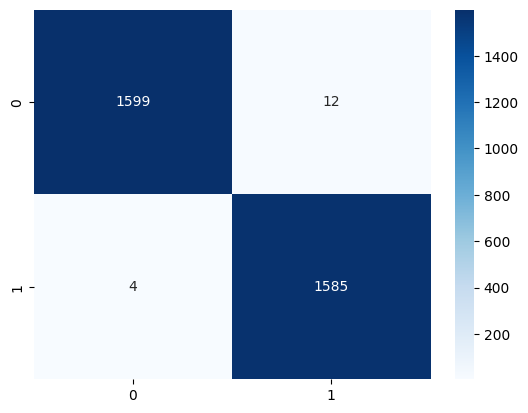

In [25]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [26]:
def predict_news(text):
    cleaned = clean_text(text)
    processed = preprocess(cleaned)
    vector = tfidf.transform([processed])
    pred = model.predict(vector)[0]
    return "REAL NEWS" if pred == 1 else "FAKE NEWS"


In [ ]:
predict_news("Government approves new bill for education reforms.")

'REAL NEWS'

In [29]:
import pickle

pickle.dump(model, open("fake_news_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))


In [35]:
predict_news("PML-N Senator Mir Dostain Khan Domki claims Mir Sarfraz Bugti will be removed as chief minister in the next few days.")

'REAL NEWS'

In [42]:
proba = model.predict_proba(tfidf.transform(["Aliens have landed in New York City..."]))
print(proba)


[[0.18091714 0.81908286]]


In [44]:
predict_news("today is Imran khan Birthday")

'FAKE NEWS'